### Step1-Logistic Regression
- Author:**Hemanth**
- Dataset Name: **Heart Disease**
- Data source: **Kaggel**
> Goal is to perform **Logistc Regression** and find the best **Model** to **evaluate metrics**
 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import os
import seaborn as sns


In [20]:
df =pd.read_csv('../data/heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [21]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


### Step2-Sanity checks

In [22]:
df.shape

(319795, 18)

- data set contains 319795 rows and 18 coloumns

In [23]:

df.isnull().sum()

HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Missing values:
- BMI - **2**
- DiffWalking -**1**

In [24]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319793.000000,319795.00000,319795.000000,319795.000000
mean,28.325407,3.37171,3.898366,7.097075
std,6.356104,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**we described the dataset**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319793 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**all the information present in dataset**

In [26]:
df.duplicated().sum()

np.int64(18078)

#### Duplicated rows found : 18078

In [33]:
df['HeartDisease'].value_counts()

HeartDisease
No     292419
Yes     27373
Name: count, dtype: int64

There is imbalance in dataset where Yes=27373 and No=292419 

In [34]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
No     0.914404
Yes    0.085596
Name: proportion, dtype: float64

Around 91% of data is No and Yes is around 8%  

### Step3-Data Cleaning
1.Handling Misiing Values

In [27]:
print("null before dropping",df.isnull().sum())

null before dropping HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [30]:
df = df.dropna()

In [31]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**Step-2 .Handling Duplicated Rows**

In [35]:
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")

Before Dropping duplicated rows:18078
Before Dropping duplicated rows:0


### Exploratory Data Analysis(EDA)

1.Univariate Analysis

<Axes: xlabel='BMI', ylabel='Count'>

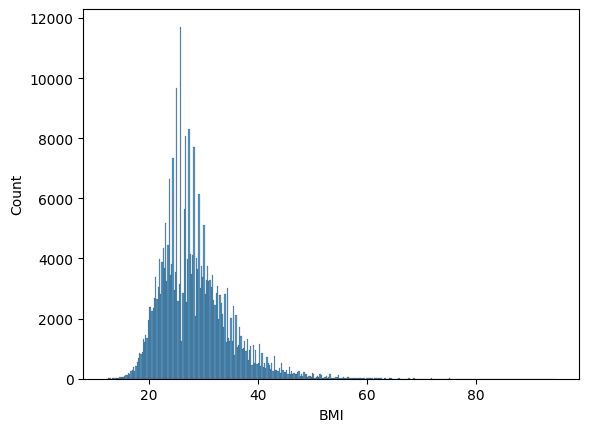

In [36]:
sns.histplot(df["BMI"])

For Numerical data we use["Histograms","KDE plots","Box plots","Summary Staistics"]

<Axes: xlabel='BMI', ylabel='Count'>

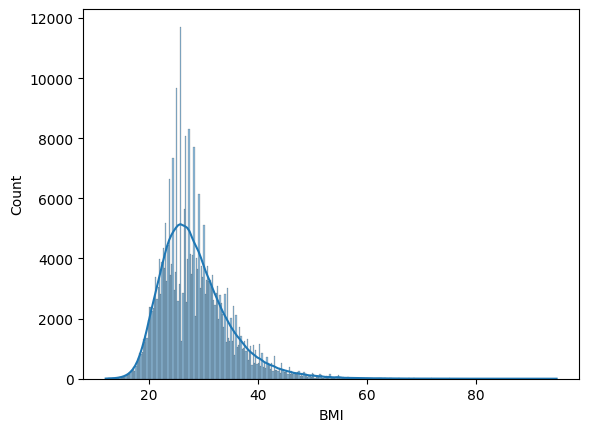

In [37]:
sns.histplot(df["BMI"],kde=True)

To get curved line we added " kde=True "

For Categorical data we use ["countplot","value counts","Bar plots"]

<Axes: xlabel='count', ylabel='KidneyDisease'>

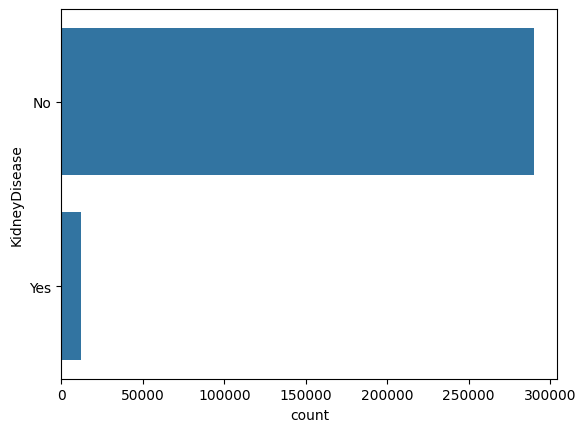

In [ ]:
sns.countplot(df["KidneyDisease"])

KidneyDisease
No     289938
Yes     11776
Name: count, dtype: int64

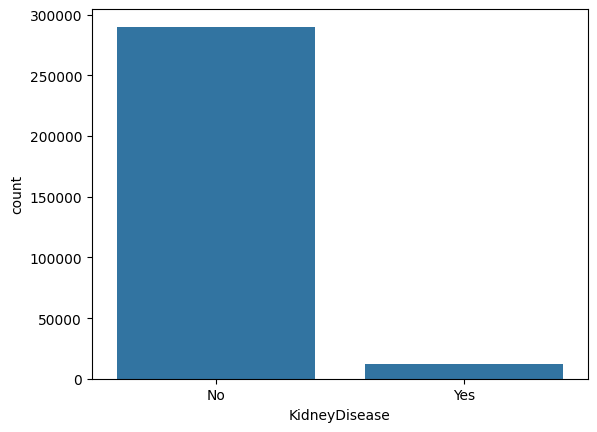

In [43]:
sns.countplot(x=df["KidneyDisease"])
df["KidneyDisease"].value_counts()

 To get the Graph upright we added " x= "
>  There are 290,000 without kidney disease and 10,000 around with kidney disease

2.Bivariate Analysis

we perform function at a time for 2 different cells 

 **1.Numeric vs Numeric**
   - Scatter plots,Correlation heatmaps

   **2.Numeric vs Categorical**
   - Box plots,Violin plots

   **3.Categorical vs Categorical**
   -  Count plots with hue,Crosstabs,Grouped bar plots   

<Axes: xlabel='Smoking', ylabel='count'>

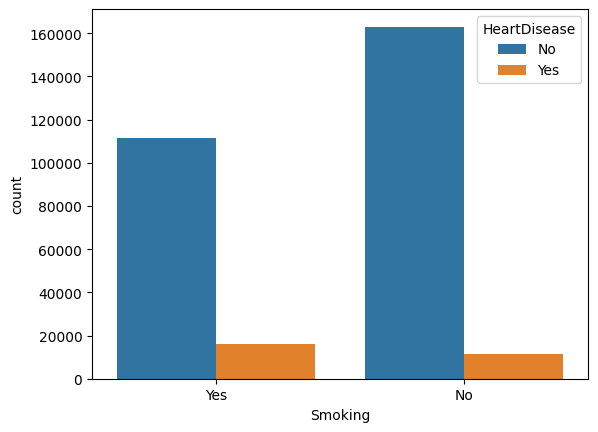

In [45]:
sns.countplot(x='Smoking', hue='HeartDisease',data=df)

People who are smoking have more heart disease than people whon are not smoking